# BANGALORE HOUSE PRICE PREDICTION MODEL

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

### LOAD DATASET

In [2]:
df1 = pd.read_csv("bengaluru_house_original.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### EXPLORATORY DATA ANALYSIS

In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df1.corr()

C:\Users\piyus\AppData\Local\Temp\ipykernel_8904\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


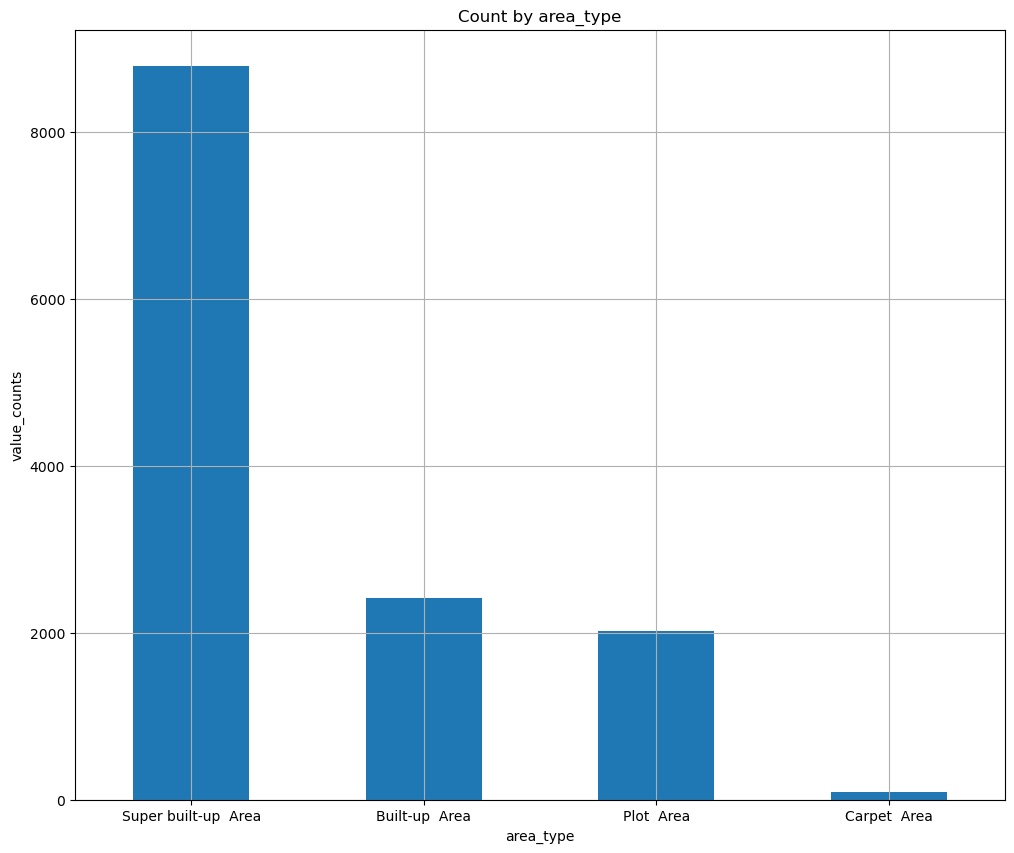

In [8]:
### checking value counts in the 'area_type'
df1.area_type.value_counts().plot.bar(figsize=(12,10),title='Count by area_type')
plt.xlabel('area_type')
plt.ylabel('value_counts')
plt.xticks(rotation=0)
plt.grid()

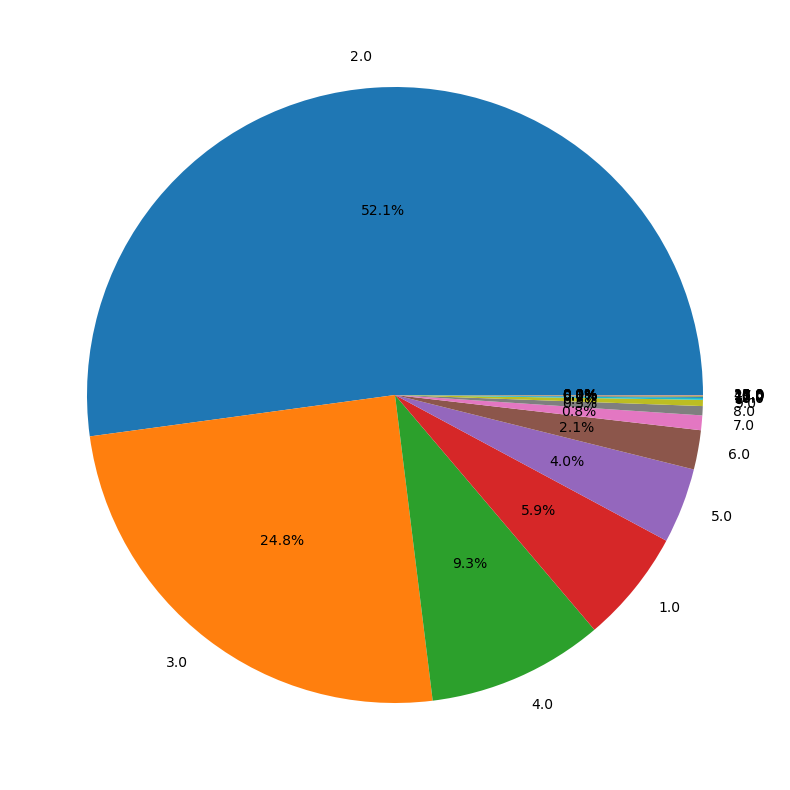

In [9]:
plt.figure(figsize=(10,10))
d=df1['bath'].value_counts()
keys=d.keys().to_list()
count=d.to_list()
plt.pie(x=count,labels=keys,autopct='%1.1f%%')
plt.show()

**NOTE:** DROP UNNECESSARY FEATURES

In [10]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

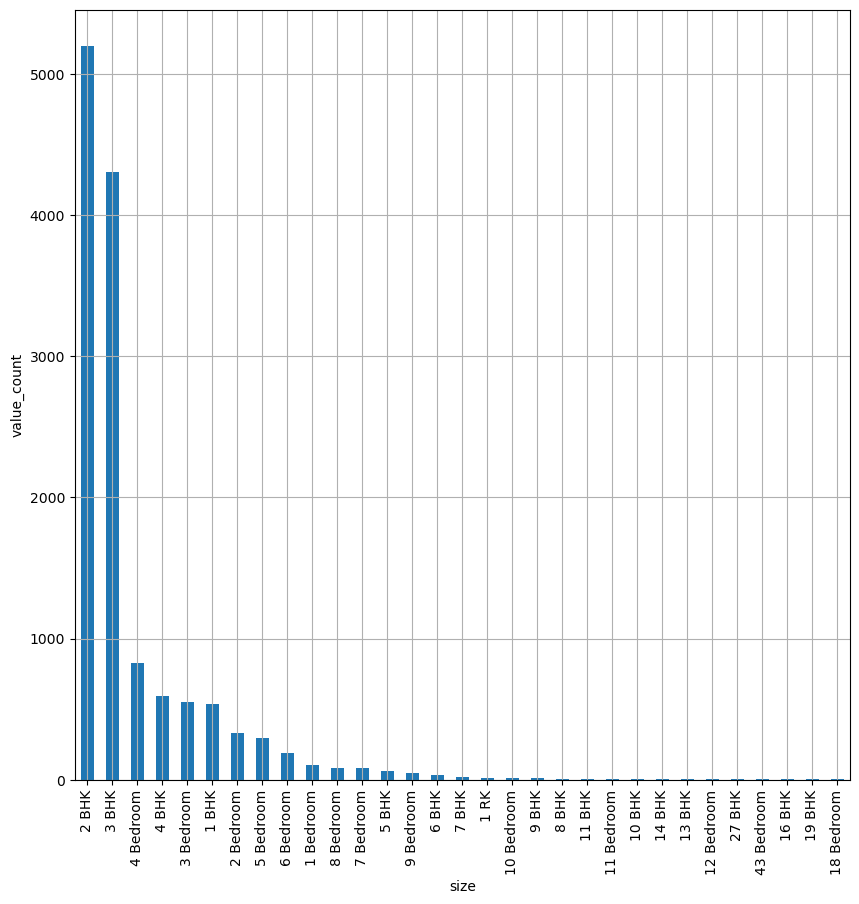

In [11]:
plt.figure(figsize = (10,10))
df1['size'].value_counts().plot(kind='bar')
plt.xlabel('size')
plt.ylabel('value_count')
plt.grid()

C:\Users\piyus\AppData\Local\Temp\ipykernel_8904\2787181702.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True,cmap='Blues')


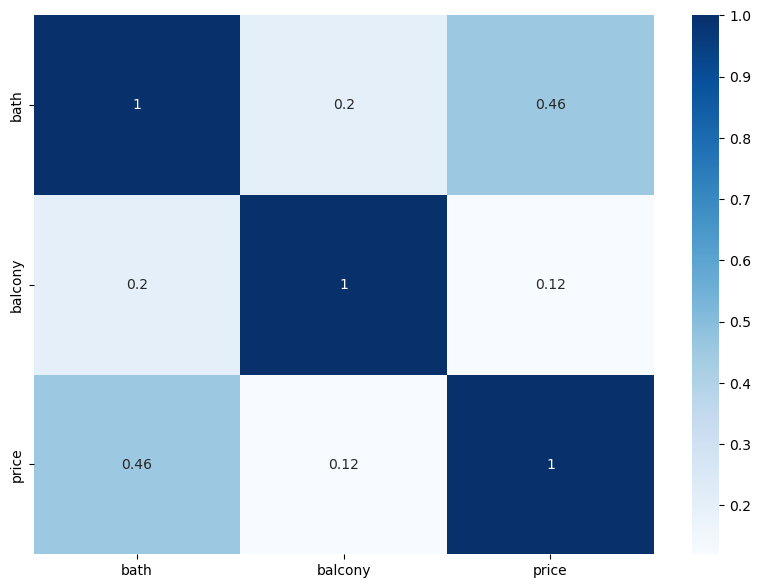

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(),annot=True,cmap='Blues')
plt.show()

### DATA CLEANING

In [13]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
df2.shape

(13320, 5)

In [15]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
df3.shape

(13246, 5)

### FEATURE ENGINEERING

In [17]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\piyus\AppData\Local\Temp\ipykernel_8904\2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

**EXPLORE TOTAL SQFT FEATURE**

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [20]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


**ABOVE DATA SHOWS THAT TOTAL SQFT CAN BE A RANGE (E.G. 2100-2850). FOR SUCH CASES WE CAN JUST TAKE AVERAGE OF MIN & MAX VALUE IN THE RANGE. THERE ARE OTHER CASES WHERE VALUES ARE IN SQM WHICH CAN BE CONVERTED TO SQFT USING UNIT CONVERSION.**

In [21]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [22]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


**FOR ROW BELOW, IT SHOWS TOTAL SQFT AS 2475 WHICH IS AN AVERAGE OF THE RANGE 2100-2850**

In [23]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [24]:
(2100+2850)/2

2475.0

**ADD NEW FEATURE CALLED PRICE PER SQUARE FEET**

In [25]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [27]:
df5.to_csv("bhp.csv",index=False)

**EXAMINE LOCATIONS WHICH IS A CATEGORICAL VARIABLE. WE NEED TO APPLY THE DIMENSIONALITY REDUCTION TECHNIQUE HERE TO REDUCE THE NUMBER OF LOCATIONS**

In [28]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [29]:
location_stats.values.sum()

13200

In [30]:
len(location_stats[location_stats>10])

240

In [31]:
len(location_stats)

1287

In [32]:
len(location_stats[location_stats<=10])

1047

### DIMENSIONALITY REDUCTIONS

**ANY LOCATION HAVING LESS THAN 10 DATA PINTS SHOULD BE TAGGED AS "OTHER" LOCATION. THIS WAY NUMBER OF CATEGORIES CAN BE REDUCED BY HUGE AMOUNT. LATER ON WHEN WE DO ONE HOT ENCODING, IT WILL HELP US WITH HAVING FEWER DUMMY COLUMNS.**

In [33]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [34]:
len(df5.location.unique())

1287

In [35]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [36]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


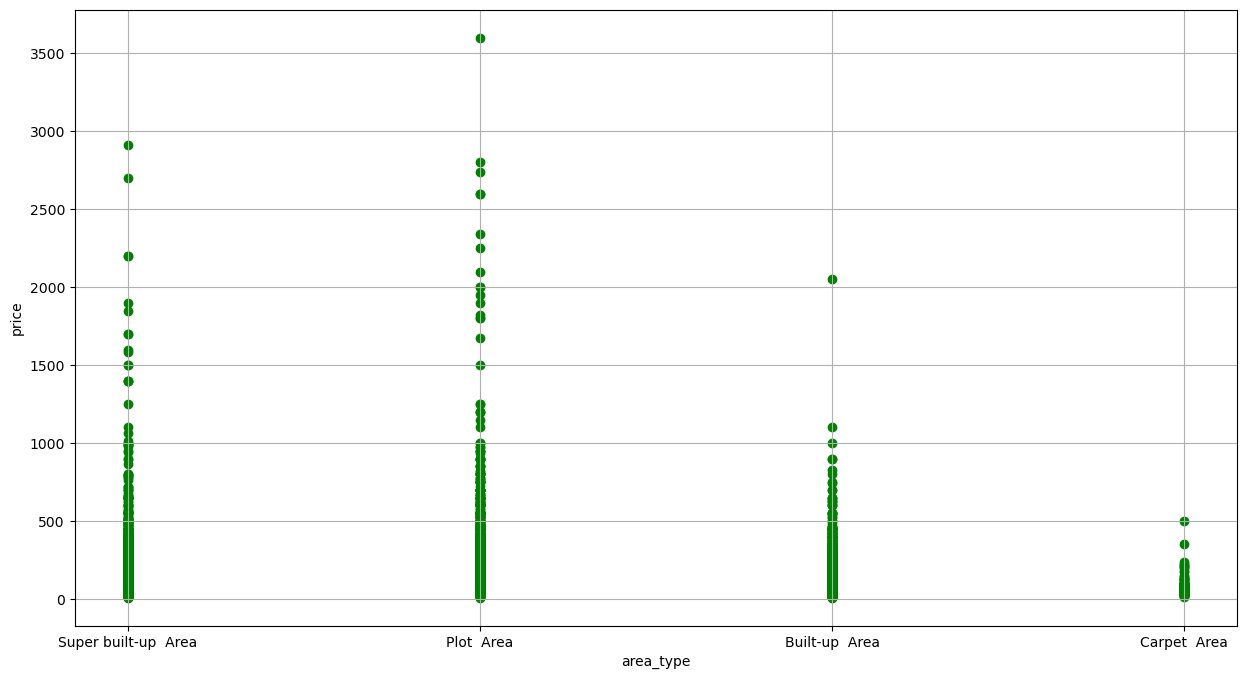

In [37]:
plt.figure(figsize=(15,8))
plt.scatter(x='area_type',y='price',data=df1,color="green")
plt.xlabel('area_type')
plt.ylabel('price')
plt.grid()
plt.show()

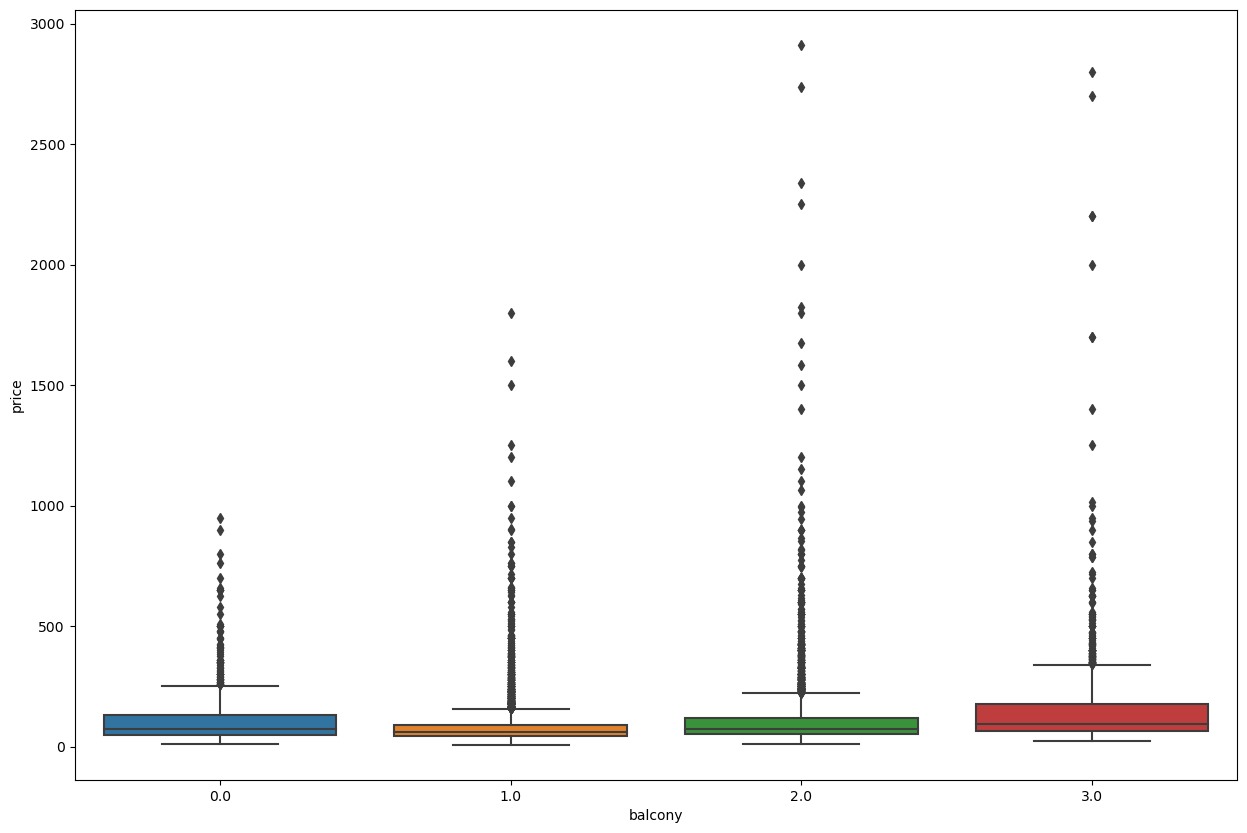

In [38]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df1,x='balcony',y='price')
plt.xlabel('balcony')
plt.ylabel('price')
plt.show()

### OUTLIER REMOVAL USING BUSINESS LOGIC

**AS A DATA SCIENTIST S A DATA SCIENTIST WHEN YOU HAVE A CONVERSATION WITH YOUR BUSINESS MANAGER (WHO HAS EXPERTISE IN REAL ESTATE), HE WILL TELL YOU THAT NORMALLY SQUARE FT PER BEDROOM IS 300 (I.E. 2 BHK APARTMENT IS MINIMUM 600 SQFT. IF YOU HAVE FOR EXAMPLE 400 SQFT APARTMENT WITH 2 BHK THAN THAT SEEMS SUSPICIOUS AND CAN BE REMOVED AS AN OUTLIER. WE WILL REMOVE SUCH OUTLIERS BY KEEPING OUR MINIMUM THRESOLD PER BHK TO BE 300 SQFT**

In [39]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


**CHECK THE ABOVE DATA POINTS. WE HAVE 6 BHK APARTMENTS WITH 1020 SQFT. ANOTHER ONE IS 8 BHK AND THE TOTAL SQFT IS 600. THESE ARE CLEAR DATA ERRORS THAT CAN BE REMOVED SAFELY**

In [40]:
df5.shape

(13200, 7)

In [41]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

### OUTLIER REMOVAL USING STANDARD DEVIATION AND MEAN

In [42]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**HERE WE FIND THAT MIN PRICE PER SQFT IS 267 RS/SQFT WHEREAS MAX IS 12000000, THIS SHOWS A WIDE VARIATION IN PROPERTY PRICES. WE SHOULD REMOVE OUTLIERS PER LOCATION USING MEAN AND ONE STANDARD DEVIATION**

In [43]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

**LET'S CHECK IF FOR A GIVEN LOCATION HOW DOES THE 2 BHK AND 3 BHK PROPERTY PRICES LOOK LIKE**

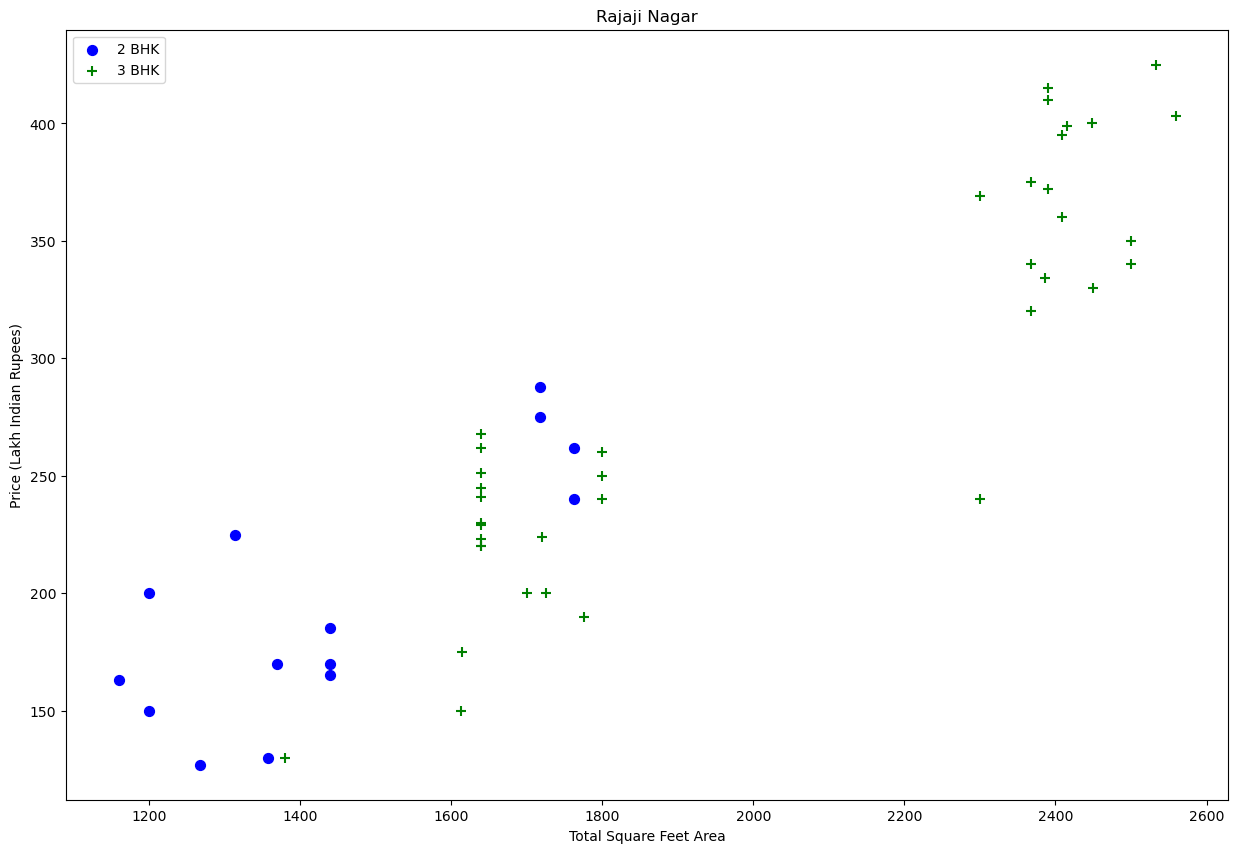

In [44]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

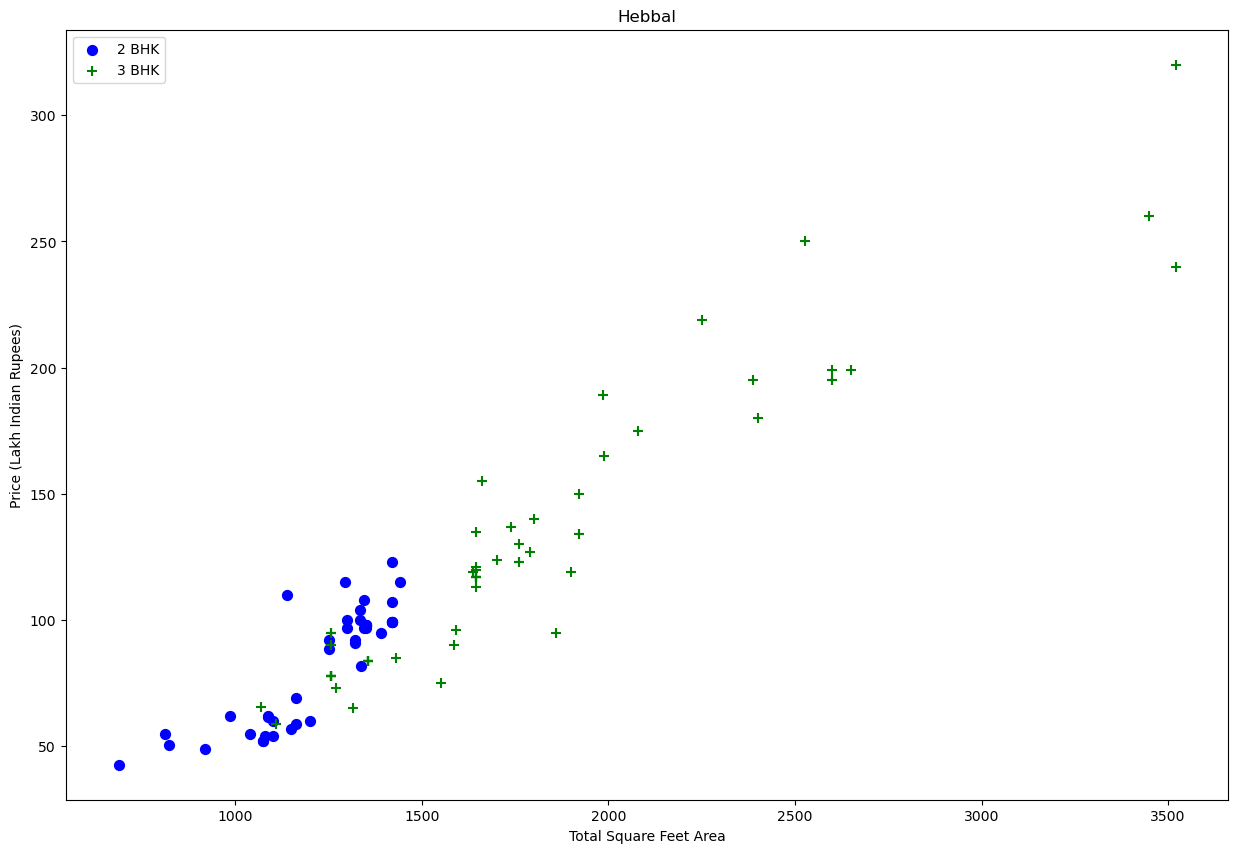

In [45]:
plot_scatter_chart(df7,"Hebbal")



**NOW WE CAN REMOVE THOSE 2 BHK APARTMENTS WHOSE PRICE_PER_SQFT IS LESS THAN THE MEAN PRICE_PER_SQFT OF 1 BHK APARTMENT**

In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

**PLOT SAME SCATTER CHART AGAIN TO VISUALIZE PRICE_PER_SQFT FOR 2 BHK AND 3 BHK PROPERTIES**

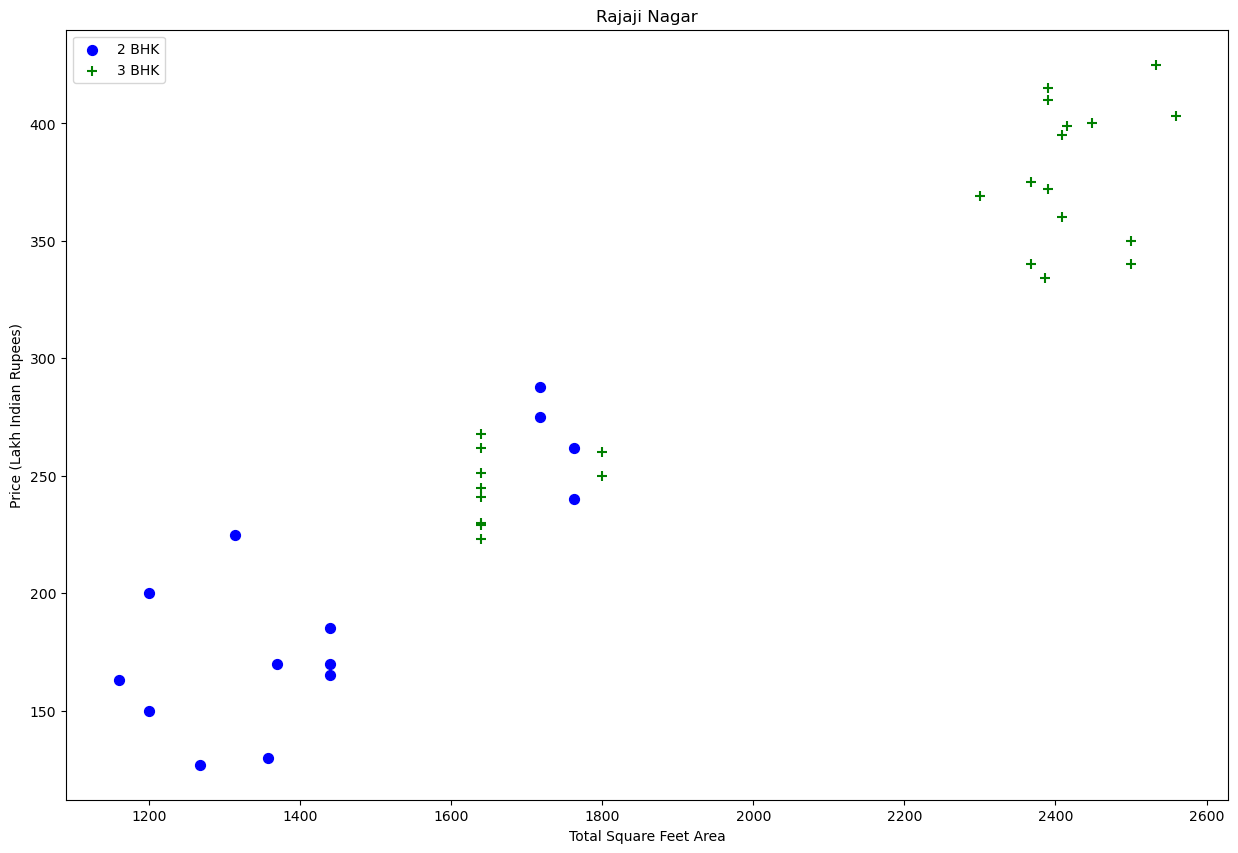

In [47]:
plot_scatter_chart(df8,"Rajaji Nagar")

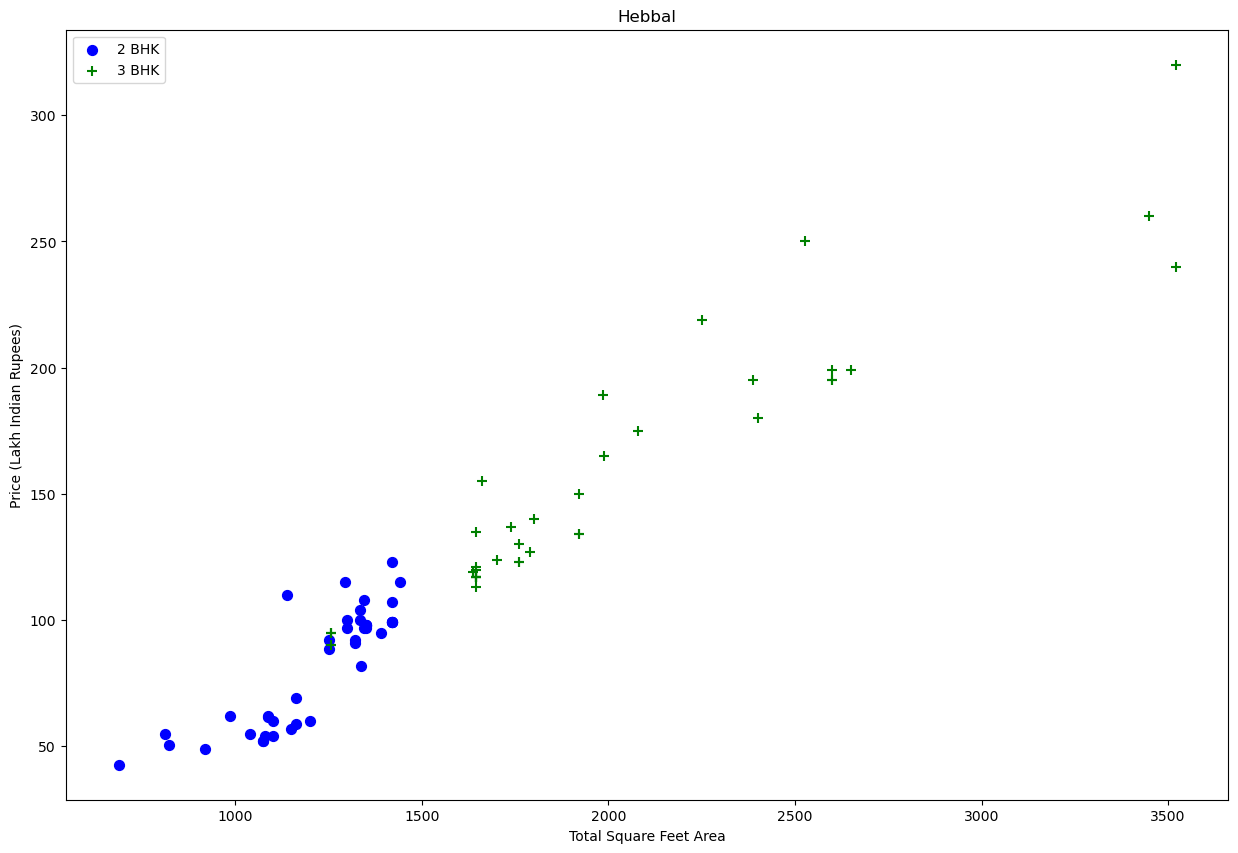

In [48]:
plot_scatter_chart(df8,"Hebbal")

**BASED ON ABOVE CHARTS WE CAN SEE THAT DATA POINTS HIGHLIGHTED IN RED BELOW ARE OUTLIERS AND THEY ARE BEING REMOVED DUE TO REMOVE_BHK_OUTLIERS FUNCTION**

Text(0, 0.5, 'Count')

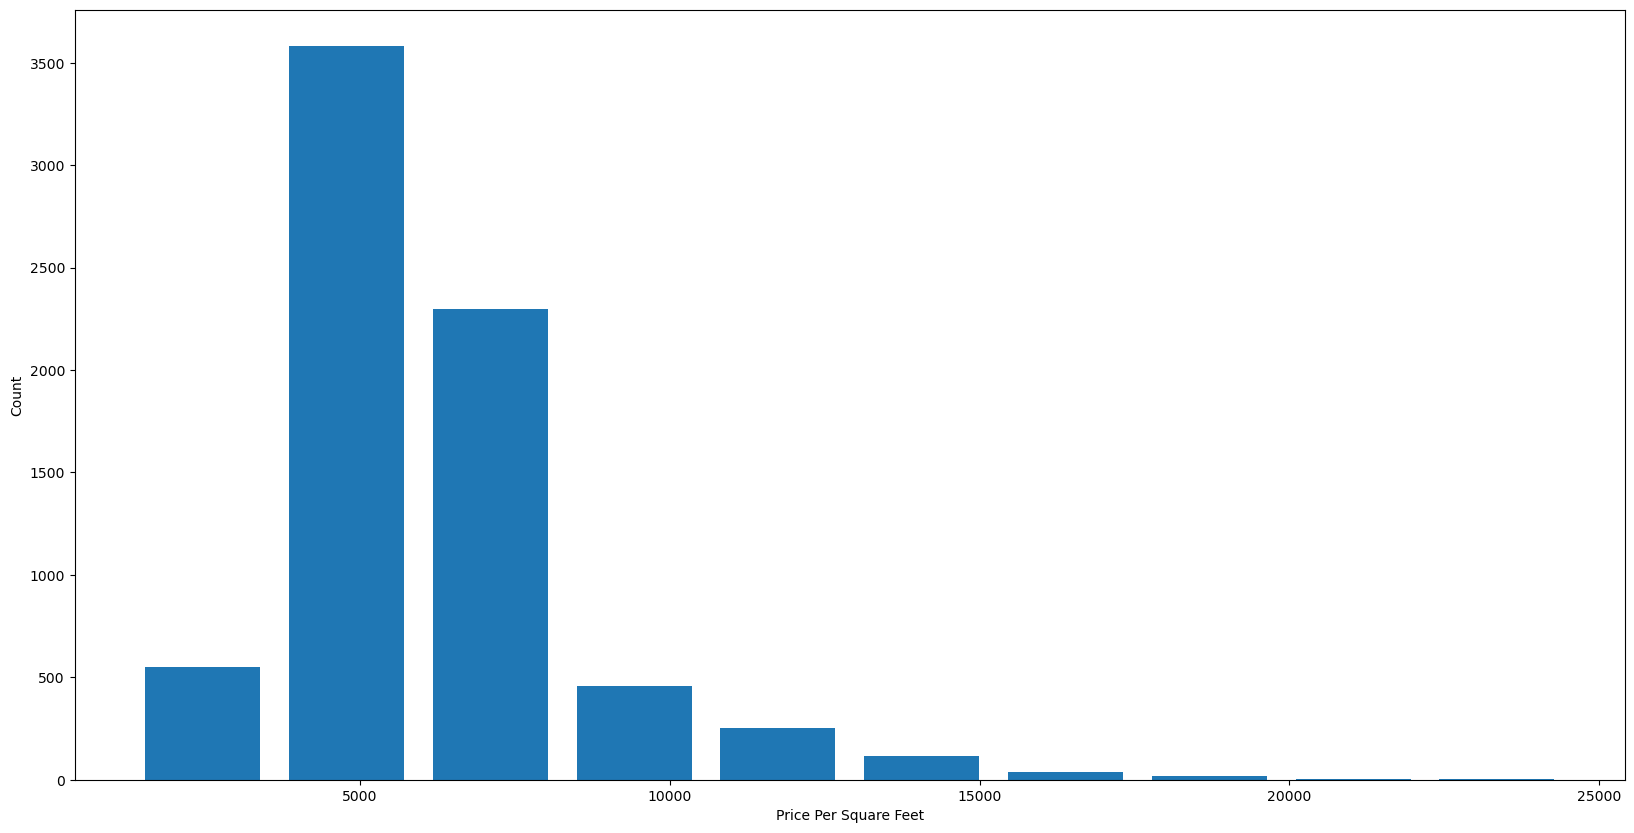

In [49]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### OUTLIER REMOVAL USING BATHROOMS FEATURE

In [50]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

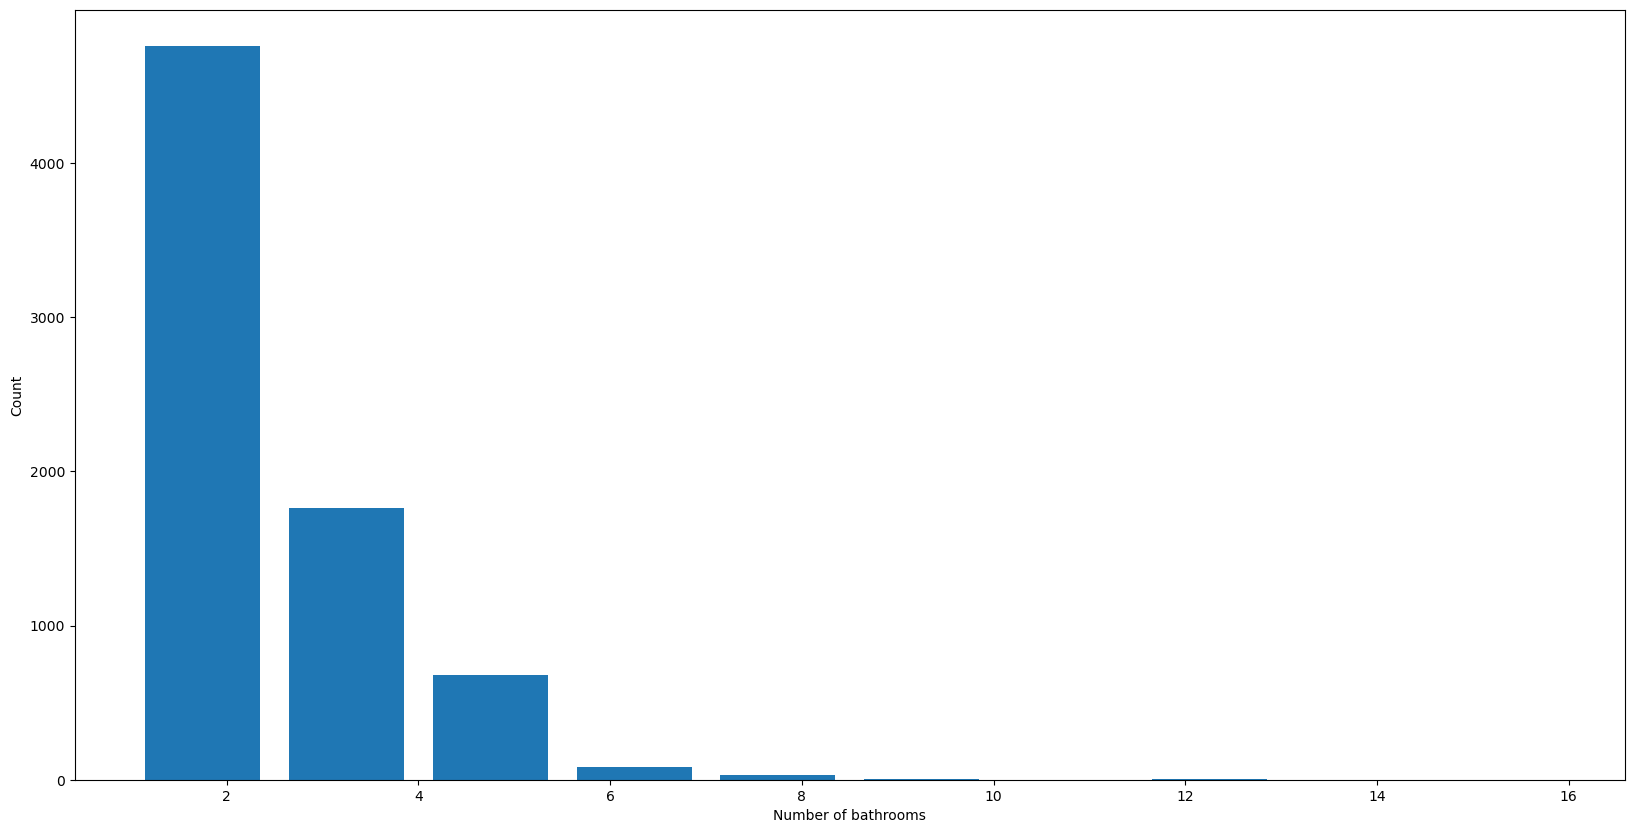

In [51]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [52]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


**IT IS UNUSUAL TO HAVE 2 MORE BATHROOMS THAN NUMBER OF BEDROOMS IN A HOME**

In [53]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


**AGAIN THE BUSINESS MANAGER HAS A CONVERSATION WITH YOU (I.E. A DATA SCIENTIST) THAT IF YOU HAVE A 4 BEDROOM HOME AND EVEN IF YOU HAVE A BATHROOM IN ALL 4 ROOMS PLUS ONE GUEST BATHROOM, YOU WILL HAVE A TOTAL BATH = TOTAL BED + 1 MAX. ANYTHING ABOVE THAT IS AN OUTLIER OR A DATA ERROR AND CAN BE REMOVED**

In [54]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [55]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [56]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


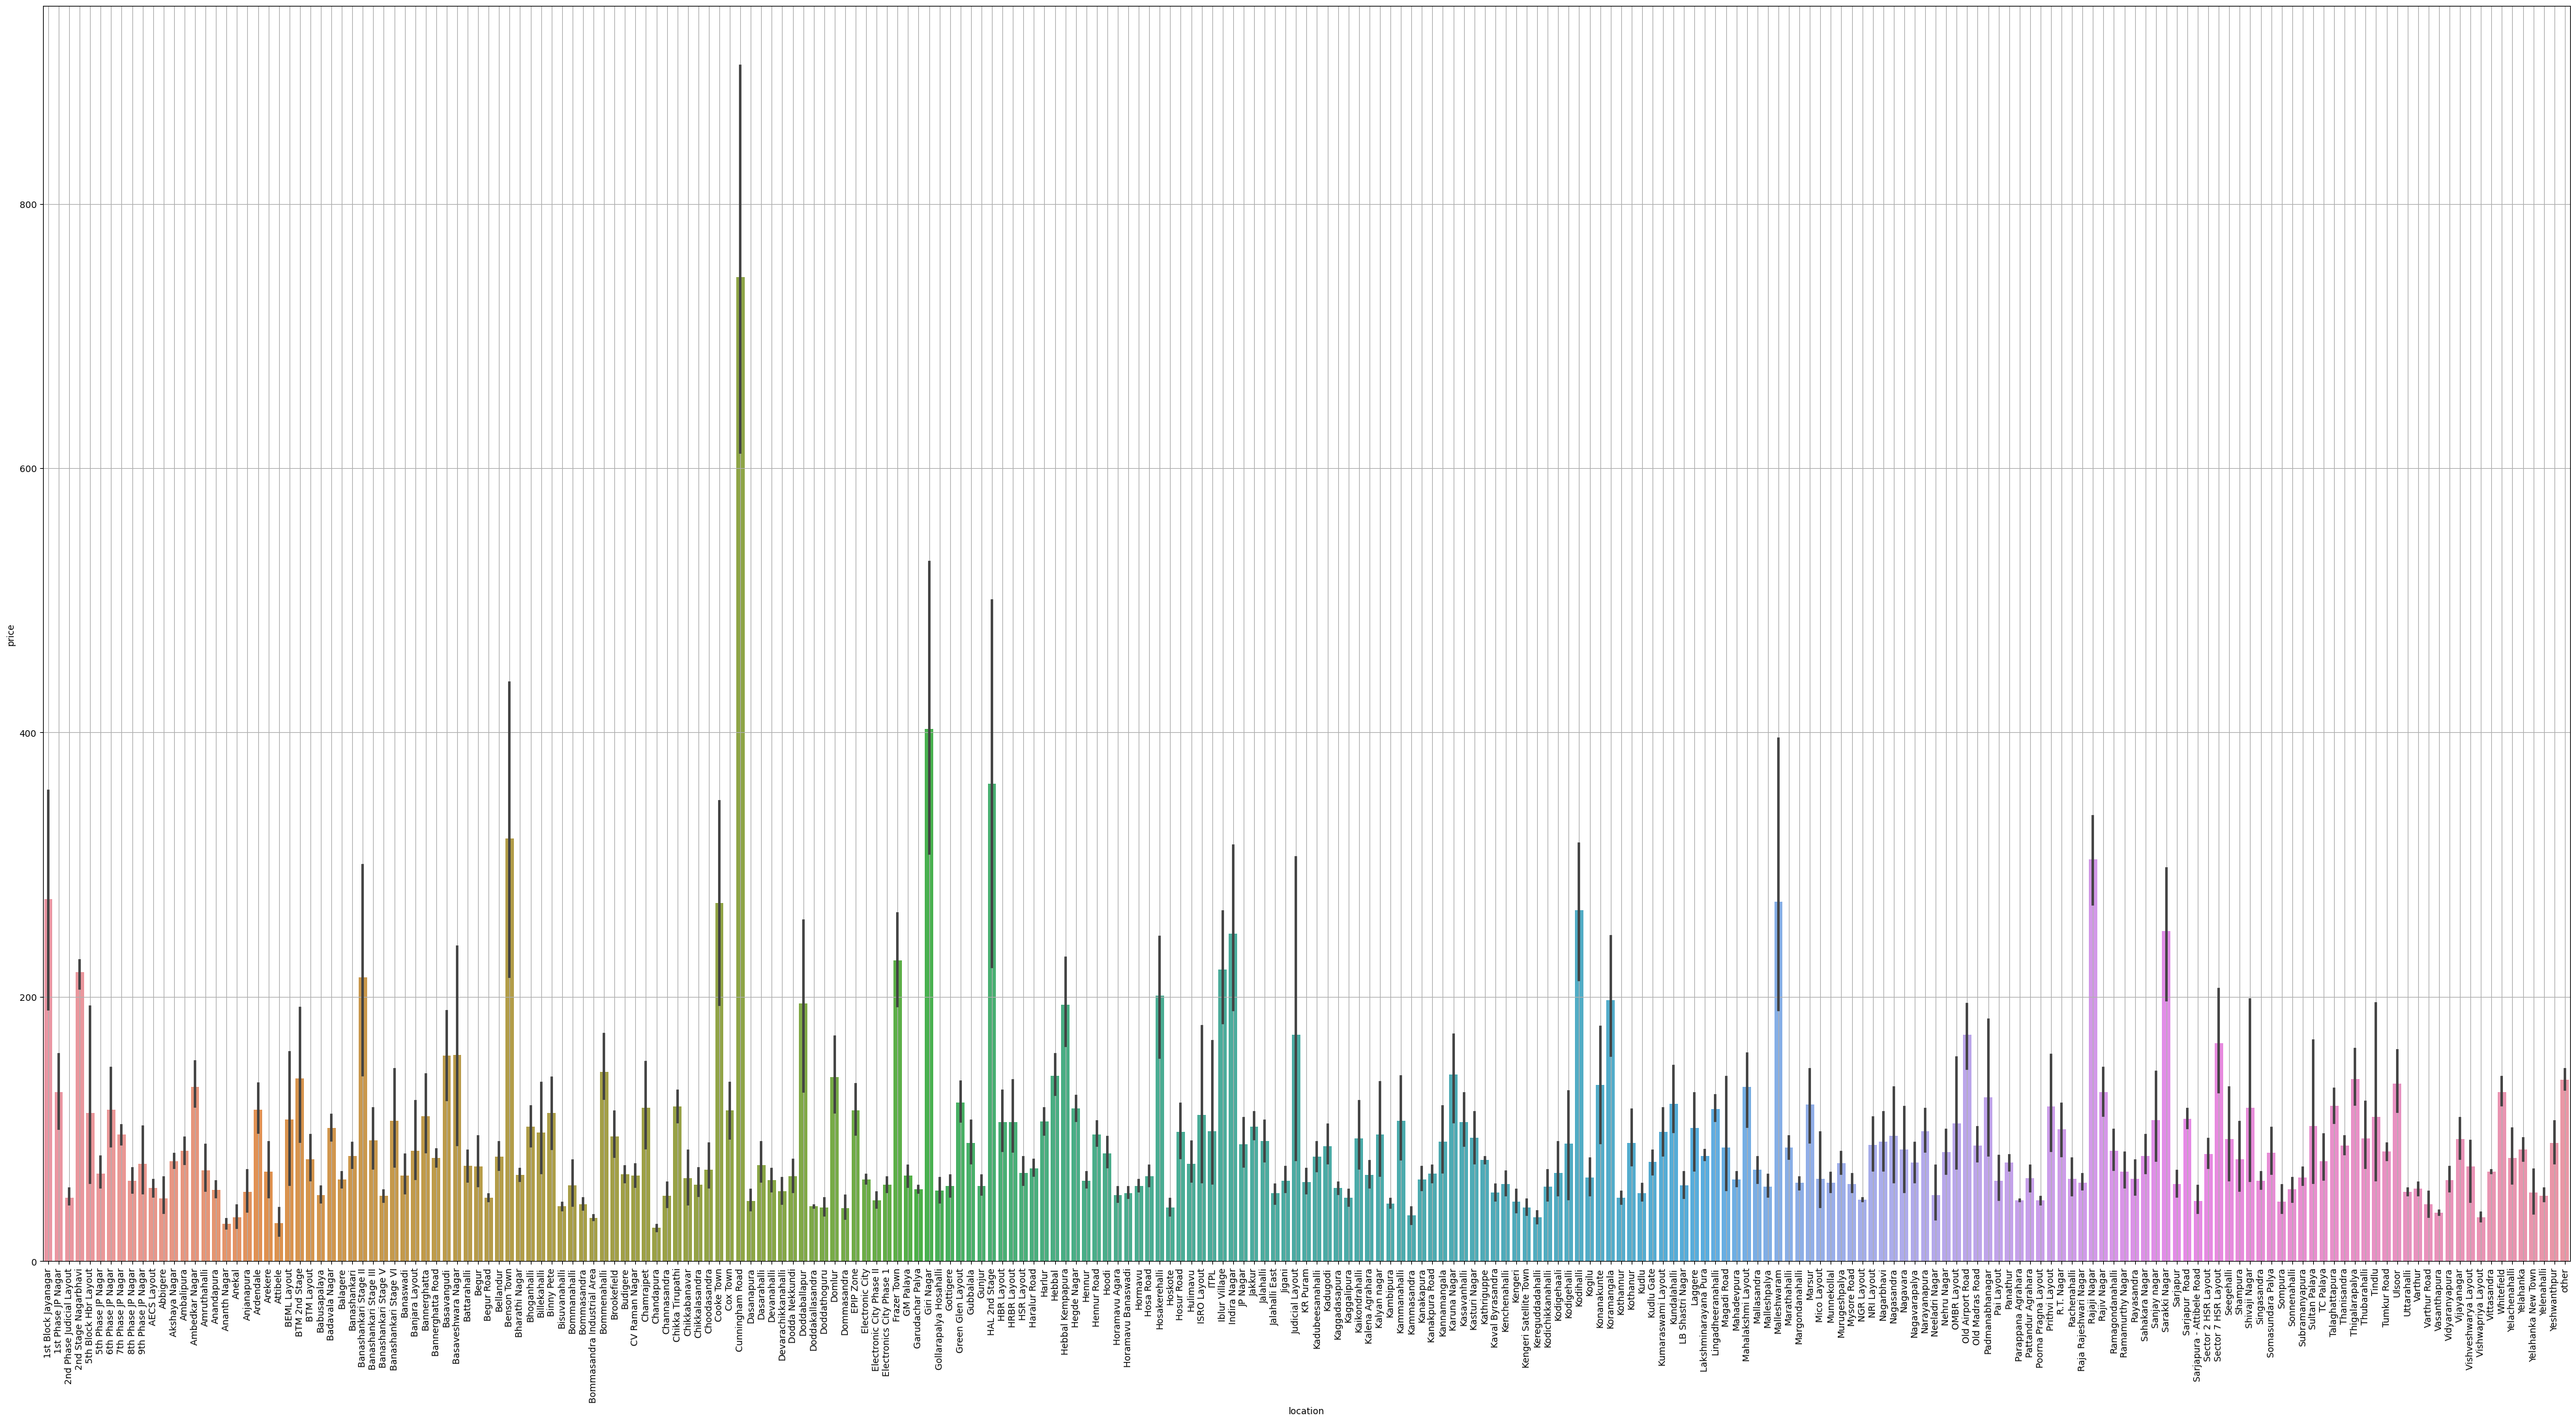

In [57]:
plt.figure(figsize=(50,25))
sns.barplot(x='location',y='price',data=df10)
plt.xlabel('location')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

### USE ONE HOT ENCODING FOR LOCATION

In [58]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### BUILDING A MODEL

In [61]:
df12.shape

(7239, 244)

In [62]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
X.shape

(7239, 243)

In [64]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [65]:
len(y)

7239

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [67]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)


LinearRegression()

In [68]:
pre=lr_clf.predict(X_test)

### USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR LINEAR REGRESSION MODEL

In [69]:
lr_clf.score(X_test,y_test)

0.8629132245229442

In [70]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

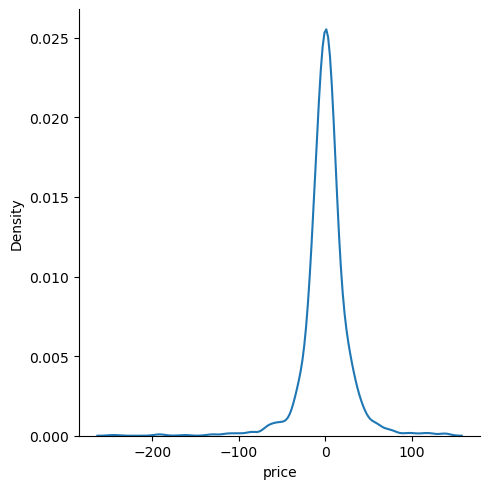

In [71]:
sns.displot(pre - y_test,kind='kde')

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test,pre)

0.8629132245229442

In [73]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,pre)
mse

711.0563858518074

In [74]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,pre)

16.1554311566994

In [75]:
RMSE=mse**0.5
RMSE

26.665640548312492

In [76]:
df1_new=pd.get_dummies(df12)

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x=df1_new.drop('price',axis=1)
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_sc=pd.DataFrame(x_sc)

X=x_sc
y=df1_new['price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

RFC=RandomForestRegressor(n_estimators=50,n_jobs=-1,oob_score=True,random_state=1)

RFC.fit(X_train,y_train)

train_pred=RFC.predict(X_train)

test_pred=RFC.predict(X_test)

In [78]:
RFC.score(X_test,y_test)

0.793917087833528

In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,test_pred)

19.211163285845487

In [80]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,test_pred)
mse

1536.248535950127

In [81]:
rmse=mse**0.5
rmse

39.19500651805185

**WE CAN SEE THAT IN 5 ITERATIONS WE GET A SCORE ABOVE 80% ALL THE TIME. THIS IS PRETTY GOOD BUT WE WANT TO TEST FEW OTHER ALGORITHMS FOR REGRESSION TO SEE IF WE CAN GET AN EVEN BETTER SCORE. WE WILL USE GRIDSEARCHCV FOR THIS PURPOSE**

### FIND BEST MODEL USING GRIDSEARCHCV

In [82]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor(),
            'params': {
                
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            
        })

    return pd.DataFrame(scores,columns=['model','best_score'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\base.py", line 

,model,best_score
0,linear_regression,0.847796
1,decision_tree,0.714402
2,RandomForest,0.783663


**BASED ON THE ABOVE RESULTS WE CAN SAY THAT LINEAR REGRESSION GIVES THE BEST SCORE. HENCE WE WILL USE THAT.**

### TEST THE MODEL FOR FEW PROPERTIES

In [83]:
def predict_price(location, total_sqft, bath, bhk):
    # Check if the location is present in the columns
    if location in X.columns:
        loc_index = np.where(X.columns == location)[0][0]
    else:
        # If the location is not present, set loc_index to -1 or handle it accordingly
        loc_index = -1

    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [84]:
predicted_price = predict_price('1st Block Jayanagar', 1630.0, 3.0, 3)
print("Predicted Price:", predicted_price)

Predicted Price: 134.10452516887455


C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [85]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.63024615089012

In [86]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.41532588414253

In [87]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.63024615089012